# Analysis the results  of cross-correlation between R0 and mobility.

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import util
import matplotlib.ticker as mticker

## Loading data

In [162]:
analysis = '2021'
column_x = 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_WHITED'
column_y = 'r0_DETRENDED'
confidence_level = 'CONFIANCE_LEVEL_HARD'
# confidence_level = 'CONFIANCE_LEVEL'

In [163]:
df_lags = pd.read_csv('../data/df_lags_'+analysis+'.csv', index_col=0)

In [164]:
df_lags

,LAG,CORRELATION,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,CONFIANCE_LEVEL,CONFIANCE_LEVEL_HARD,MAX_LEGS_TO_SHOW
0,-30,-0.098162,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
1,-29,-0.091944,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
2,-28,-0.087643,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
3,-27,-0.086026,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
4,-26,-0.088358,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
...,...,...,...,...,...,...,...,...,...
2496,26,0.049028,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2497,27,0.049149,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2498,28,0.049346,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2499,29,0.049436,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30


In [165]:
df_covid_mobility = pd.read_csv('../data/df_ts_covid_mobility.csv')

## Cross-correlation analysis

In [166]:
def get_lag_x_lead_y(lags, c, max_lags_to_show, conf_level, negative_correlation):
    lags_x_lead_y = lags[:max_lags_to_show]
    c_x_lead_y = c[:max_lags_to_show]
    if negative_correlation:
        c_reference = c_x_lead_y.min()
    else:
        c_reference = c_x_lead_y.max()
    if abs(c_reference) > conf_level:
        lags_reference = lags_x_lead_y[c_x_lead_y==c_reference]
        lag_reference = lags_reference.max()
        return lag_reference, c_reference
    else:
        return None, None

def get_lag_y_lead_x(lags, c, max_lags_to_show, conf_level, negative_correlation):
    lags_y_lead_x = lags[max_lags_to_show+1:]
    c_y_lead_x = c[max_lags_to_show+1:]
    if negative_correlation:
        c_reference = c_y_lead_x.min()
    else:
        c_reference = c_y_lead_x.max()
    if abs(c_reference) > conf_level:
        lags_reference = lags_y_lead_x[c_y_lead_x==c_reference]
        lag_reference = lags_reference.min()
        return lag_reference, c_reference
    else:
        return None, None

In [167]:
df_lags[(df_lags.MUNICIPIO == 'São Paulo') & (df_lags.Y == column_y)]

,LAG,CORRELATION,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,CONFIANCE_LEVEL,CONFIANCE_LEVEL_HARD,MAX_LEGS_TO_SHOW
2318,-30,-0.035225,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2319,-29,-0.035596,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2320,-28,-0.037631,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2321,-27,-0.035987,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2322,-26,-0.042165,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
...,...,...,...,...,...,...,...,...,...
2374,26,0.044865,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2375,27,0.041816,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2376,28,0.038871,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2377,29,0.035198,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30


In [168]:
df_lags

,LAG,CORRELATION,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,CONFIANCE_LEVEL,CONFIANCE_LEVEL_HARD,MAX_LEGS_TO_SHOW
0,-30,-0.098162,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
1,-29,-0.091944,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
2,-28,-0.087643,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
3,-27,-0.086026,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
4,-26,-0.088358,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.102847,30
...,...,...,...,...,...,...,...,...,...
2496,26,0.049028,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2497,27,0.049149,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2498,28,0.049346,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30
2499,29,0.049436,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.096009,30


In [169]:
df_test = df_lags[(df_lags.MUNICIPIO == 'São Paulo') & (df_lags.Y == column_y)]
get_lag_x_lead_y(df_test.LAG.values, df_test.CORRELATION.values, df_test.MAX_LEGS_TO_SHOW.min(), df_test[confidence_level].min(), negative_correlation=True)

(None, None)

In [170]:
df_test = df_lags[(df_lags.MUNICIPIO == 'São Paulo') & (df_lags.Y == column_y)]
get_lag_x_lead_y(df_test.LAG.values, df_test.CORRELATION.values, df_test.MAX_LEGS_TO_SHOW.min(), df_test[confidence_level].min(), negative_correlation=False)

(None, None)

In [171]:
df_test = df_lags[(df_lags.MUNICIPIO == 'São Paulo') & (df_lags.Y == column_y)]
get_lag_x_lead_y(df_test.LAG.values, df_test.CORRELATION.values, df_test.MAX_LEGS_TO_SHOW.min(), df_test[confidence_level].min(), negative_correlation=True)

(None, None)

In [172]:
df_test

,LAG,CORRELATION,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,CONFIANCE_LEVEL,CONFIANCE_LEVEL_HARD,MAX_LEGS_TO_SHOW
2318,-30,-0.035225,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2319,-29,-0.035596,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2320,-28,-0.037631,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2321,-27,-0.035987,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2322,-26,-0.042165,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
...,...,...,...,...,...,...,...,...,...
2374,26,0.044865,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2375,27,0.041816,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2376,28,0.038871,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30
2377,29,0.035198,3550308,São Paulo,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.102591,0.098881,30


In [173]:
def get_lags(function, df_municipality_y, negative_correlation, id_municipality, name_municipality, x, y, df_to_append):
    if len(df_municipality_y) > 0:
        lag_min, c_min = function(df_municipality_y.LAG.values, df_municipality_y.CORRELATION.values,
                                          df_municipality_y.MAX_LEGS_TO_SHOW.min(), df_municipality_y[confidence_level].min(),
                                          negative_correlation=negative_correlation)
        df_row = pd.DataFrame([{'CODIGO_MUNICIPIO_7': id_municipality, 'MUNICIPIO': name_municipality, 'X': x, 'Y': y,
                                'LAG': lag_min, 'CORRELATION': c_min}])
        df_to_append = pd.concat([df_to_append, df_row], ignore_index=True)
    return df_to_append

df_lags_mobility_lead_y_inversely = pd.DataFrame()
df_lags_mobility_lead_y_directly = pd.DataFrame()
df_lags_y_lead_mobility_inversely = pd.DataFrame()
df_lags_y_lead_mobility_directly = pd.DataFrame()

x = column_x

for id_municipality in df_lags.CODIGO_MUNICIPIO_7.unique():
    df_municipality = df_lags[df_lags.CODIGO_MUNICIPIO_7==id_municipality]
    name_municipality = df_municipality.MUNICIPIO.values[-1]
    for y in [column_y]:
        df_municipality_y = df_municipality[(df_municipality.Y == y)]

        df_lags_mobility_lead_y_inversely = get_lags(get_lag_x_lead_y, df_municipality_y, True, id_municipality, name_municipality, x, y, df_lags_mobility_lead_y_inversely)
        df_lags_mobility_lead_y_directly = get_lags(get_lag_x_lead_y, df_municipality_y, False, id_municipality, name_municipality, x, y, df_lags_mobility_lead_y_directly)
        df_lags_y_lead_mobility_inversely = get_lags(get_lag_y_lead_x, df_municipality_y, True, id_municipality, name_municipality, x, y, df_lags_y_lead_mobility_inversely)
        df_lags_y_lead_mobility_directly = get_lags(get_lag_y_lead_x, df_municipality_y, False, id_municipality, name_municipality, x, y, df_lags_y_lead_mobility_directly)

In [174]:
df_lags_mobility_lead_y_inversely[df_lags_mobility_lead_y_inversely.Y == column_y].LAG.dropna().astype(int).describe()

count     1.0
mean    -10.0
std       NaN
min     -10.0
25%     -10.0
50%     -10.0
75%     -10.0
max     -10.0
Name: LAG, dtype: float64

In [175]:
df_lags_mobility_lead_y_inversely[df_lags_mobility_lead_y_inversely.Y == column_y]

,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,LAG,CORRELATION
0,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,-10,-0.136674
1,2800308,Aracaju,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
2,3106200,Belo Horizonte,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
3,1501402,Belém,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
4,5300108,Brasília,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
5,3509502,Campinas,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
6,5002704,Campo Grande,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
7,3118601,Contagem,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
8,5103403,Cuiabá,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN
9,4106902,Curitiba,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,None,NaN


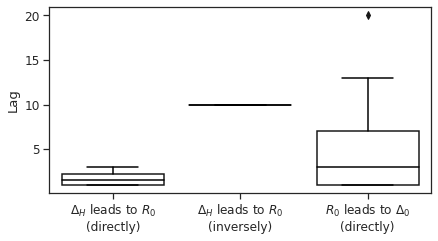

In [176]:
df_lags_mobility_lead_y_directly['xlabel'] = '$\Delta_{H}$ leads to $R_{0}$\n(directly)'
df_lags_mobility_lead_y_inversely['xlabel'] = '$\Delta_{H}$ leads to $R_{0}$\n(inversely)'
df_lags_y_lead_mobility_directly['xlabel'] = '$R_{0}$ leads to $\Delta_{0}$\n(directly)'
df_lags_y_lead_mobility_inversely['xlabel'] = '$R_{0}$ leads to $\Delta_{0}$\n(inversely)'
df_chart = pd.concat([df_lags_mobility_lead_y_directly, df_lags_mobility_lead_y_inversely, df_lags_y_lead_mobility_directly, df_lags_y_lead_mobility_inversely], ignore_index=True)
df_chart = df_chart[df_chart.Y==column_y]
df_chart = df_chart.dropna()
df_chart.LAG = abs(df_chart.LAG)

sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.set_palette("gray")
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))

chart = sns.boxplot(data=df_chart, x='xlabel', y='LAG', ax=ax, boxprops=dict(facecolor='white'))
chart.set(ylabel='Lag', xlabel=None)

plt.setp(ax.artists, edgecolor = 'black')
plt.setp(ax.lines, color='black')

plt.show()

In [177]:
def plot_cross_correlation_mobility_y(municipality_name, y, save):
    df = df_lags[(df_lags.MUNICIPIO == municipality_name) & (df_lags.Y == y)].dropna()
    df.LAG = df.LAG.astype(int)
    df.CORRELATION = df.CORRELATION.astype(float)

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))

    y_label = "Correlation coefficient"

    chart = sns.barplot(data=df, x='LAG', y='CORRELATION', ax=ax, color='black')
    chart.set(ylabel = y_label, xlabel = 'Lag (day)', xticks=[0, 15, 30, 45, 60])

    ax.axhline(df[confidence_level].min(), 0, 1, linestyle='--', color='red')
    ax.axhline(df[confidence_level].min()*-1, 0, 1, linestyle='--', color='red')

    if save:
        plt.savefig('images/cross_correlation_mobility_'+y+'_'+analysis+'.eps', bbox_inches="tight")
        plt.savefig('images/cross_correlation_mobility_'+y+'_'+analysis+'.pdf', bbox_inches="tight")
    plt.show()

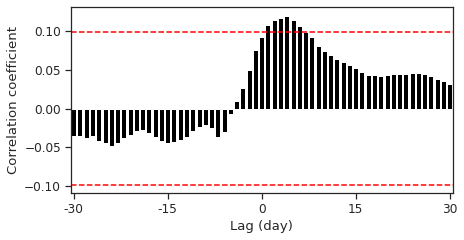

In [178]:
plot_cross_correlation_mobility_y('São Paulo', column_y, False)

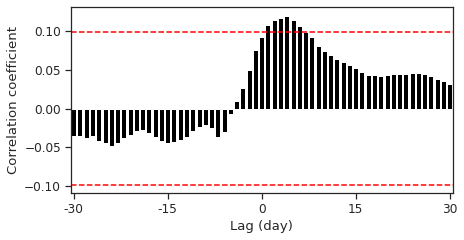

In [179]:
plot_cross_correlation_mobility_y('São Paulo', column_y, False)

In [180]:
plt.rc('font', size=7)
style = dict(color='black')
sns.set_style("ticks")

In [181]:
df_lags_y_lead_mobility_directly.dropna()

,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,LAG,CORRELATION,xlabel
2,3106200,Belo Horizonte,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,20,0.093662,$R_{0}$ leads to $\Delta_{0}$\n(directly)
4,5300108,Brasília,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,1,0.110396,$R_{0}$ leads to $\Delta_{0}$\n(directly)
5,3509502,Campinas,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,1,0.132876,$R_{0}$ leads to $\Delta_{0}$\n(directly)
8,5103403,Cuiabá,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,1,0.124373,$R_{0}$ leads to $\Delta_{0}$\n(directly)
9,4106902,Curitiba,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,1,0.108822,$R_{0}$ leads to $\Delta_{0}$\n(directly)
13,2304400,Fortaleza,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,1,0.095061,$R_{0}$ leads to $\Delta_{0}$\n(directly)
15,3518800,Guarulhos,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,8,0.125469,$R_{0}$ leads to $\Delta_{0}$\n(directly)
19,3136702,Juiz de Fora,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,3,0.144246,$R_{0}$ leads to $\Delta_{0}$\n(directly)
26,4314902,Porto Alegre,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,7,0.119920,$R_{0}$ leads to $\Delta_{0}$\n(directly)
31,3547809,Santo André,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,6,0.124244,$R_{0}$ leads to $\Delta_{0}$\n(directly)


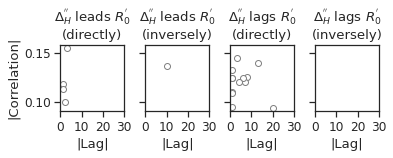

In [182]:
df_number_samples = pd.DataFrame()

fig, ax = plt.subplots(1,4, figsize=(util.centimeter_to_inch(13.92), util.centimeter_to_inch(5.6)), sharex=True, sharey=True)

for y, y_label in zip([column_y], ["$R_{0}^{'}$"]):
    j = 0
    for df, title in zip([df_lags_mobility_lead_y_directly, df_lags_mobility_lead_y_inversely, df_lags_y_lead_mobility_directly, df_lags_y_lead_mobility_inversely], ["$\Delta_{H}^{''}$ leads " + y_label + '\n(directly)', "$\Delta_{H}^{''}$ leads " + y_label + '\n(inversely)', "$\Delta_{H}^{''}$ lags " + y_label + '\n(directly)', "$\Delta_{H}^{''}$ lags " + y_label + '\n(inversely)']):
        df_chart = df[df.Y == y].dropna().copy()
        df_chart.LAG = df_chart.LAG.astype(int)
        df_chart.LAG = abs(df_chart.LAG)
        df_chart.CORRELATION = abs(df_chart.CORRELATION)

        ax[j].scatter(x = df_chart['LAG'], y =df_chart['CORRELATION'], c='w', edgecolors='gray')

        # ax[j].axvline(df_chart.LAG.median(), 0, 1, linestyle='--', color='red')
        # ax[j].axhline(df_chart.CORRELATION.median(), 0, 1, linestyle='--', color='red')

        ax[j].set_title(title)
        
        ax[j].set_xlabel('|Lag|')
        ax[j].set_xticks([0, 10, 20, 30])
        # ax[i][j].set_xlim((min_lag-5, max_lag+5))

        if j == 0:
            ax[j].set_ylabel("|Correlation|")
            ax[j].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}"))

        j += 1        
        
        try:
            df_chart_describe = df_chart.describe()[['LAG','CORRELATION']].reset_index().copy()
            df_chart_describe['y'] = y_label
            df_chart_describe['title'] = title
            df_number_samples = df_number_samples.append(df_chart_describe, ignore_index=True)
        except KeyError:
            pass

fig.tight_layout()

plt.savefig('../images/scatter_lag_correlation_'+analysis+'.pdf', bbox_inches="tight")

df_number_samples.to_csv('../data/df_number_samples_'+analysis + '.csv')

plt.show()

In [183]:
df_number_samples

,index,LAG,CORRELATION,y,title
0,count,4.000000,4.000000,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
1,mean,1.750000,0.121547,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
2,std,0.957427,0.023627,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
3,min,1.000000,0.099663,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
4,25%,1.000000,0.109532,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
5,50%,1.500000,0.115814,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
6,75%,2.250000,0.127828,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
7,max,3.000000,0.154896,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(directly)
8,count,1.000000,1.000000,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(inversely)
9,mean,10.000000,0.136674,$R_{0}^{'}$,$\Delta_{H}^{''}$ leads $R_{0}^{'}$\n(inversely)


In [184]:
df_lags_mobility_lead_y_directly[df_lags_mobility_lead_y_directly.Y==column_y].LAG.dropna().astype(float).describe()

count    4.000000
mean    -1.750000
std      0.957427
min     -3.000000
25%     -2.250000
50%     -1.500000
75%     -1.000000
max     -1.000000
Name: LAG, dtype: float64

In [185]:
df_lags_mobility_lead_y_inversely[df_lags_mobility_lead_y_inversely.Y==column_y].LAG.dropna().astype(float).describe()

count     1.0
mean    -10.0
std       NaN
min     -10.0
25%     -10.0
50%     -10.0
75%     -10.0
max     -10.0
Name: LAG, dtype: float64

In [186]:
df_lags_mobility_lead_y_inversely[df_lags_mobility_lead_y_inversely.Y==column_y].LAG.dropna().astype(float)

0   -10.0
Name: LAG, dtype: float64

In [187]:
temp = df_lags_mobility_lead_y_inversely[(df_lags_mobility_lead_y_inversely.Y==column_y)].dropna()
temp['LAG'] = temp['LAG'].astype(float)
temp[temp['LAG'] <= -23].describe().round(2)

,CODIGO_MUNICIPIO_7,LAG,CORRELATION
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [188]:
temp[temp['LAG'] > -23].describe().round(2)

,CODIGO_MUNICIPIO_7,LAG,CORRELATION
count,1.0,1.0,1.00
mean,5201405.0,-10.0,-0.14
std,NaN,NaN,NaN
min,5201405.0,-10.0,-0.14
25%,5201405.0,-10.0,-0.14
50%,5201405.0,-10.0,-0.14
75%,5201405.0,-10.0,-0.14
max,5201405.0,-10.0,-0.14


In [189]:
df_lags_mobility_lead_y_inversely[df_lags_mobility_lead_y_inversely.Y==column_y].LAG.dropna().astype(float)

0   -10.0
Name: LAG, dtype: float64

In [190]:
df_lags_y_lead_mobility_directly [df_lags_y_lead_mobility_directly.Y==column_y].LAG.dropna().astype(float).describe()

count    13.000000
mean      5.153846
std       5.800088
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      20.000000
Name: LAG, dtype: float64

In [191]:
df_lags_y_lead_mobility_inversely [df_lags_y_lead_mobility_inversely.Y==column_y].LAG.dropna().astype(float).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: LAG, dtype: float64